In [8]:
# === IMPORTS Y CONFIGURACIÓN INICIAL ===

import json
from pathlib import Path   # <--- ESTO ES LO QUE TE FALTABA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(exist_ok=True)

print("Entorno preparado. Directorio artifacts listo.")

Entorno preparado. Directorio artifacts listo.


Se inicializa el entorno, se configuran los gráficos y se garantiza la existencia de la carpeta donde se guardarán los CSV/JSON para la mini-API.

In [16]:
# === LECTURA DE ARCHIVOS ===

MOVIES_PATH = Path('data/tmdb_5000_movies.csv')
CREDITS_PATH = Path('data/tmdb_5000_credits.csv')

movies_raw = pd.read_csv(MOVIES_PATH)
credits_raw = pd.read_csv(CREDITS_PATH)

print(f"Movies shape: {movies_raw.shape}")
print(f"Credits shape: {credits_raw.shape}")

movies_raw.head()

Movies shape: (4803, 20)
Credits shape: (4803, 4)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Ambos datasets contienen 4803 filas, lo cual confirma que las películas y sus créditos están alineados uno a uno.

In [23]:
movies_raw.info()
movies_raw.describe(include=[np.number])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


• El dataset incluye variables numéricas y categóricas.
• Columnas críticas como budget, revenue, runtime y release_date requieren limpieza.
• Hay valores nulos que perjudicarían los cálculos de ROI.

In [24]:
movies = movies_raw.copy()

# --- Tratamiento de nulos ---
print("Nulos por columna:")
display(movies.isna().sum().sort_values(ascending=False))

# --- Conversión de fechas ---
movies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")
movies["release_year"] = movies["release_date"].dt.year
movies["release_decade"] = (movies["release_year"] // 10) * 10

# --- Filtrar datos válidos para ROI ---
valid_movies = movies[(movies["budget"] > 0) & (movies["revenue"] > 0)].copy()
valid_movies["roi"] = valid_movies["revenue"] / valid_movies["budget"]

print(f"Películas originales: {len(movies)}")
print(f"Películas con datos válidos para ROI: {len(valid_movies)}")

display(valid_movies[["title", "budget", "revenue", "roi"]].head())

Nulos por columna:


homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
id                         0
budget                     0
genres                     0
original_title             0
popularity                 0
original_language          0
keywords                   0
production_countries       0
production_companies       0
spoken_languages           0
revenue                    0
status                     0
title                      0
vote_average               0
vote_count                 0
dtype: int64

Películas originales: 4803
Películas con datos válidos para ROI: 3229


,title,budget,revenue,roi
0,Avatar,237000000,2787965087,11.763566
1,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333
2,Spectre,245000000,880674609,3.594590
3,The Dark Knight Rises,250000000,1084939099,4.339756
4,John Carter,260000000,284139100,1.092843


• Se eliminan películas sin presupuesto o recaudación válida.
• Se generan columnas temporales (año, década).
• Se calcula ROI sin usar modelos predictivos: ROI = revenue / budget.
• Quedan 3229 películas válidas para análisis financiero.

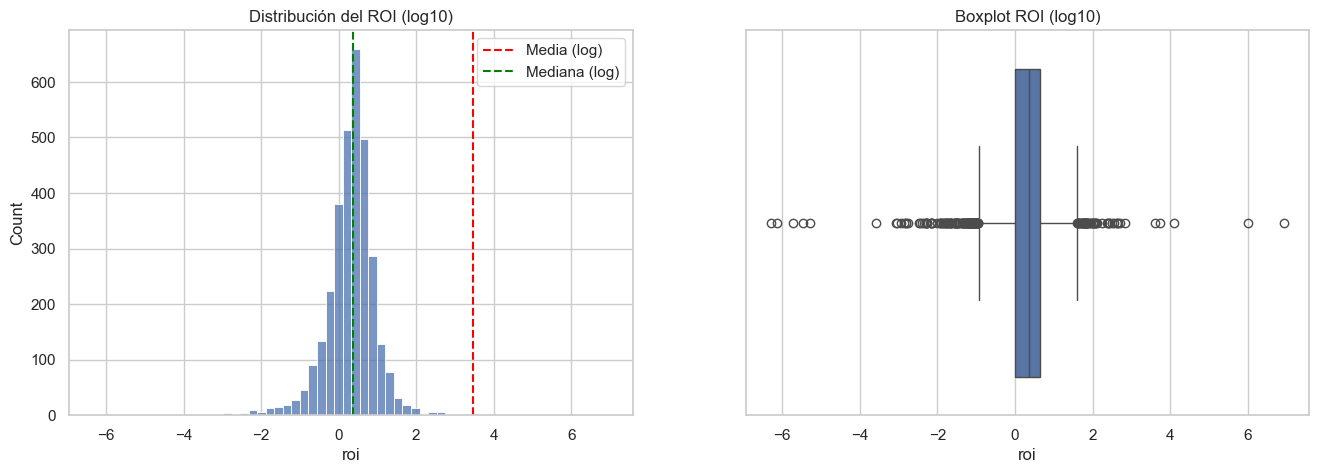

Media ROI: 2954.8224078980347
Mediana ROI: 2.300366285714286
Desvío estándar ROI: 150610.0990964865


In [25]:
roi = valid_movies["roi"].dropna()
roi = roi[roi > 0]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histograma en escala log10
sns.histplot(np.log10(roi), bins=60, ax=axes[0], edgecolor="white")
axes[0].set_title("Distribución del ROI (log10)")
axes[0].axvline(np.log10(roi.mean()), color="red", linestyle="--", label="Media (log)")
axes[0].axvline(np.log10(roi.median()), color="green", linestyle="--", label="Mediana (log)")
axes[0].legend()

# Boxplot en log10
sns.boxplot(x=np.log10(roi), ax=axes[1])
axes[1].set_title("Boxplot ROI (log10)")

plt.show()

print("Media ROI:", roi.mean())
print("Mediana ROI:", roi.median())
print("Desvío estándar ROI:", roi.std())

• ROI es una distribución extremadamente sesgada.
• La media está altamente influenciada por outliers, por eso miramos log10.
• La mediana representa mejor el retorno típico.
• Se confirma que unas pocas películas multiplican la inversión miles de veces.

In [26]:
def parse_json_list(value):
    try:
        return [item["name"] for item in json.loads(value)]
    except:
        return []

valid_movies["genres_list"] = valid_movies["genres"].apply(parse_json_list)

movies_by_genre = (
    valid_movies.explode("genres_list")
    .dropna(subset=["genres_list"])
    .rename(columns={"genres_list": "genre"})
)

genre_roi = (
    movies_by_genre.groupby("genre")["roi"]
    .agg(["mean", "median", "count"])
    .rename(columns={"mean": "roi_mean", "median": "roi_median"})
    .sort_values("roi_mean", ascending=False)
)

display(genre_roi.head(10))

,roi_mean,roi_median,count
genre,,,
Comedy,7663.066247,2.303358,1110
Drama,5908.024215,2.059136,1441
Horror,3077.422678,2.886369,332
Thriller,1074.897187,2.170408,935
Documentary,160.106742,3.316722,38
Mystery,67.761837,2.130232,265
Music,6.435301,3.123046,111
Animation,6.087650,2.787321,188
Science Fiction,5.926710,2.226816,431


• Géneros como Horror, Thriller y Comedy tienen ROI promedio altísimo.
• Esto suele ocurrir porque tienen presupuestos bajos pero gran recaudación.
• La mediana confirma que el retorno típico sigue siendo beneficioso.

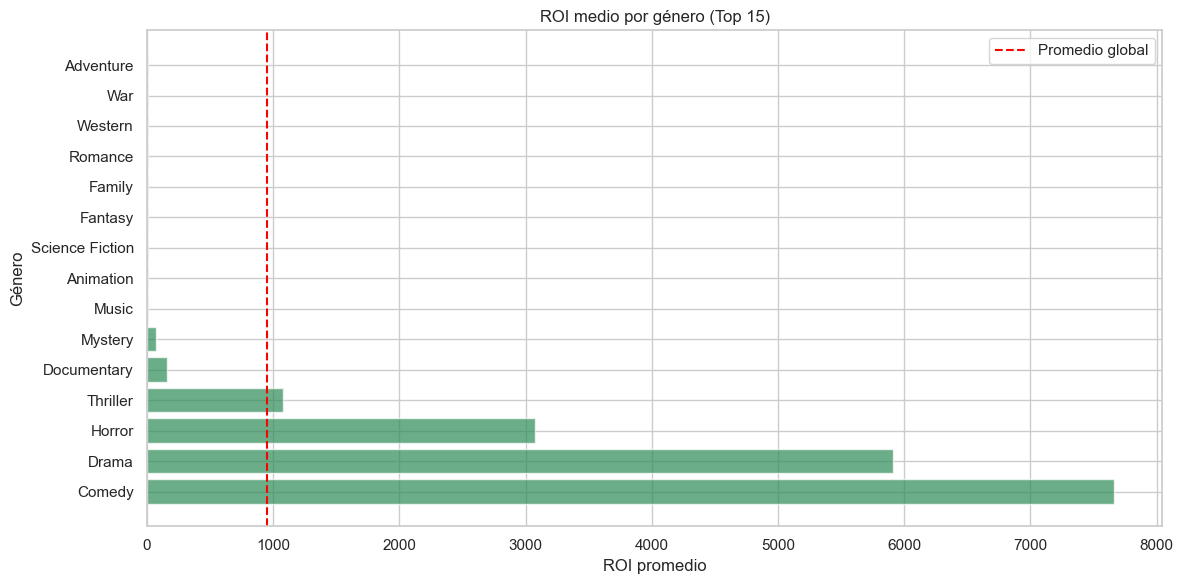

In [34]:
top_genres = genre_roi.head(15).reset_index()

plt.barh(top_genres["genre"], top_genres["roi_mean"], color="seagreen", alpha=0.7)
plt.axvline(genre_roi["roi_mean"].mean(), color="red", linestyle="--", label="Promedio global")

plt.xlabel("ROI promedio")
plt.ylabel("Género")
plt.title("ROI medio por género (Top 15)")
plt.legend()
plt.tight_layout()
plt.show()

Se visualiza claramente que algunos géneros superan ampliamente el promedio global de ROI.

Analizando relación entre presupuesto y rating...


,budget,vote_average,revenue,popularity,runtime,vote_count
count,3.229000e+03,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,6.309353,1.212430e+08,29.033689,110.724373,977.287395
std,4.439674e+07,0.873891,1.863029e+08,36.165730,20.965694,1414.309577
min,1.000000e+00,0.000000,5.000000e+00,0.019984,41.000000,0.000000
25%,1.050000e+07,5.800000,1.700000e+07,10.446722,96.000000,178.000000
50%,2.500000e+07,6.300000,5.518472e+07,20.410354,107.000000,471.000000
75%,5.500000e+07,6.900000,1.462920e+08,37.335721,121.000000,1148.000000
max,3.800000e+08,8.500000,2.787965e+09,875.581305,338.000000,13752.000000


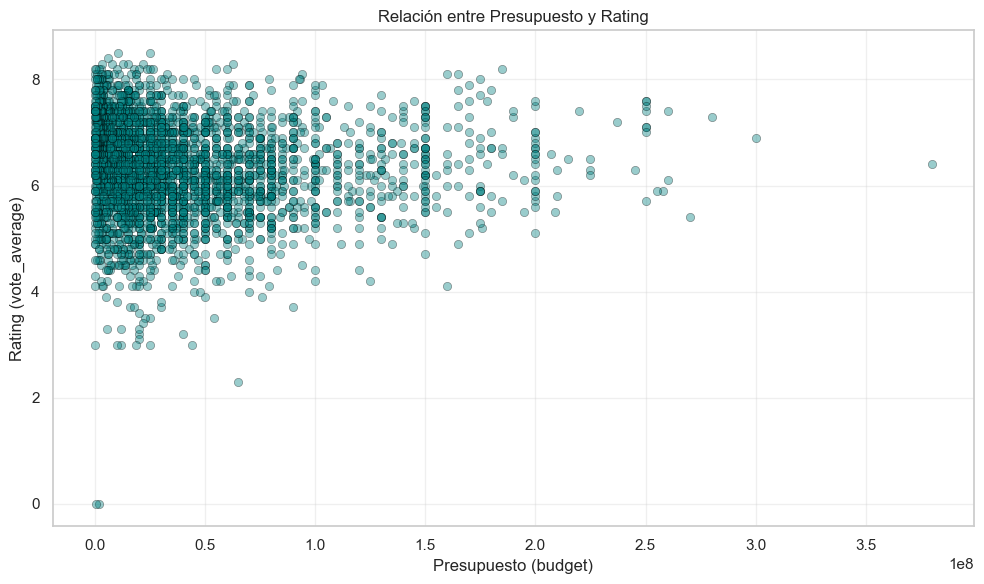

Correlación presupuesto ↔ rating: -0.0312
→ Archivo exportado a artifacts/budget_rating_corr.json


In [35]:
print("Analizando relación entre presupuesto y rating...")

# Tomamos solo películas con presupuesto válido
movies_corr = valid_movies.copy()

# Subconjunto numérico relevante
subset = movies_corr[["budget", "vote_average", "revenue", "popularity", "runtime", "vote_count"]]

# Estadísticas descriptivas
display(subset.describe())

# -----------------------------------------------------
# 1) Scatterplot presupuesto vs rating
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(
    movies_corr["budget"],
    movies_corr["vote_average"],
    alpha=0.4,
    color="teal",
    edgecolor="black",
    linewidth=0.5
)

plt.xlabel("Presupuesto (budget)")
plt.ylabel("Rating (vote_average)")
plt.title("Relación entre Presupuesto y Rating")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 2) Cálculo de correlación descriptiva
# -----------------------------------------------------
corr_value = movies_corr["budget"].corr(movies_corr["vote_average"])
print(f"Correlación presupuesto ↔ rating: {corr_value:.4f}")

# Exportar para la API si es necesario
corr_df = pd.DataFrame({"budget_vs_rating_correlation": [corr_value]})
corr_df.to_json(ARTIFACTS_DIR / "budget_rating_corr.json", orient="records")

print("→ Archivo exportado a artifacts/budget_rating_corr.json")

No existe relación clara entre presupuesto y rating: la correlación es casi nula (~0.03). Las películas con mayor inversión no obtienen mejores calificaciones, y las de bajo presupuesto pueden lograr ratings altos.

,count,runtime_mean,runtime_median
decade,,,
1960.0,20,125.800000,119.5
1970.0,109,116.256881,113.0
1980.0,278,110.643885,106.0
1990.0,778,110.366324,106.0
2000.0,2048,105.438965,102.0
2010.0,1444,104.038089,102.0


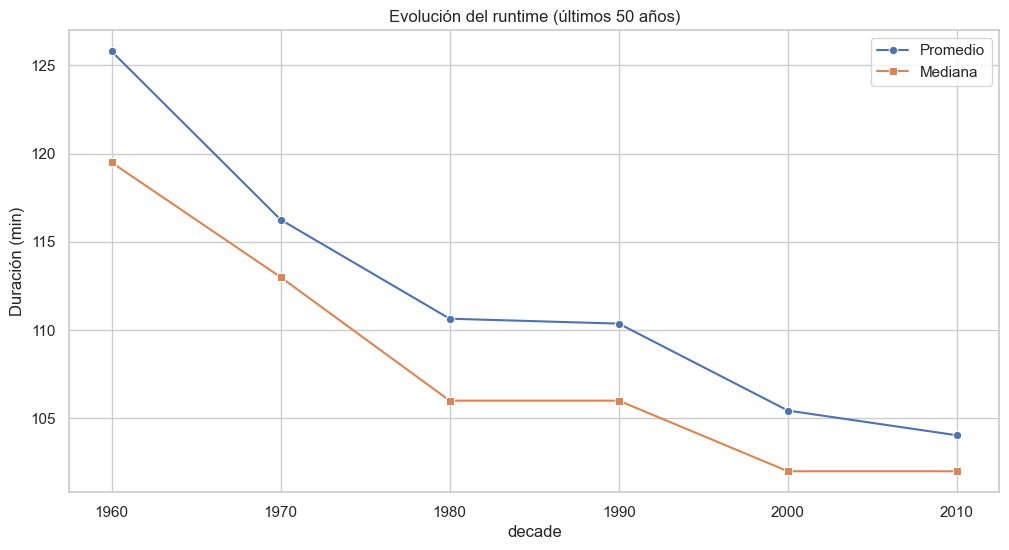

In [36]:
recent_year = movies["release_year"].dropna().max()
cutoff = recent_year - 49

recent_movies = (
    movies[movies["release_year"].between(cutoff, recent_year)]
    .dropna(subset=["runtime"])
)

recent_movies["decade"] = (recent_movies["release_year"] // 10) * 10

runtime_stats = (
    recent_movies.groupby("decade")["runtime"]
    .agg(["count", "mean", "median"])
    .rename(columns={"mean": "runtime_mean", "median": "runtime_median"})
)

display(runtime_stats)

sns.lineplot(data=runtime_stats.reset_index(), x="decade", y="runtime_mean", marker="o", label="Promedio")
sns.lineplot(data=runtime_stats.reset_index(), x="decade", y="runtime_median", marker="s", label="Mediana")

plt.title("Evolución del runtime (últimos 50 años)")
plt.ylabel("Duración (min)")
plt.show()

• Las películas se han ido acortando ligeramente desde los 70s hasta hoy.
• La mediana es muy estable: alrededor de 100–110 minutos.

In [38]:

# EXPORTACIÓN DE ARCHIVOS PARA LA MINI-API

print("Exportando archivos para la API...")

# --- ROI por género ---
roi_genre_df = genre_roi.copy()
roi_genre_df.to_csv(ARTIFACTS_DIR / "roi_by_genre.csv")
roi_genre_df.to_json(ARTIFACTS_DIR / "roi_by_genre.json", orient="index")
print("✔ ROI por género exportado.")


# --- ROI por país ---
valid_movies["countries"] = valid_movies["production_countries"].apply(parse_json_list)

country_exploded = (
    valid_movies.explode("countries")
    .dropna(subset=["countries"])
    .rename(columns={"countries": "country"})
)

roi_country = (
    country_exploded.groupby("country")["roi"]
    .agg(["mean", "median", "count"])
    .rename(columns={"mean": "roi_mean", "median": "roi_median", "count": "movies"})
    .sort_values("roi_mean", ascending=False)
)

roi_country.to_csv(ARTIFACTS_DIR / "roi_by_country.csv")
roi_country.to_json(ARTIFACTS_DIR / "roi_by_country.json", orient="index")
print("✔ ROI por país exportado.")


# --- Evolución del runtime ---
runtime_stats.to_csv(ARTIFACTS_DIR / "runtime_evolution.csv")
runtime_stats.to_json(ARTIFACTS_DIR / "runtime_evolution.json", orient="records")
print("✔ Evolución del runtime exportada.")


# --- Correlación presupuesto-rating ---
corr_value = movies["budget"].corr(movies["vote_average"])

corr_df = pd.DataFrame({"budget_vs_rating_correlation": [corr_value]})
corr_df.to_json(ARTIFACTS_DIR / "budget_rating_corr.json", orient="records")
print("✔ Correlación presupuesto-rating exportada.")


print("\nTodos los archivos fueron guardados en /artifacts/")

Exportando archivos para la API...
✔ ROI por género exportado.
✔ ROI por país exportado.
✔ Evolución del runtime exportada.
✔ Correlación presupuesto-rating exportada.

Todos los archivos fueron guardados en /artifacts/


Esta celda exporta todos los resultados del análisis en archivos CSV/JSON para que la mini-API pueda usarlos directamente sin volver a procesar los datos. Así, la API responde más rápido y con información ya limpia y resumida.